In [1]:
!ls ../checkpoints/pchat/SKT_KG/20211221170636_3000_results

best_checkpoints
checkpoint
ckpt-102000_result.txt
ckpt-105000_result.txt
ckpt-108000.data-00000-of-00001
ckpt-108000.index
ckpt-108000_result.txt
ckpt-111000.data-00000-of-00001
ckpt-111000.index
ckpt-111000_result.txt
ckpt-114000.data-00000-of-00001
ckpt-114000.index
ckpt-114000_result.txt
ckpt-117000.data-00000-of-00001
ckpt-117000.index
ckpt-117000_result.txt
ckpt-120000.data-00000-of-00001
ckpt-120000.index
ckpt-120000_result.txt
ckpt-12000_result.txt
ckpt-15000_result.txt
ckpt-18000_result.txt
ckpt-21000_result.txt
ckpt-24000_result.txt
ckpt-27000_result.txt
ckpt-30000_result.txt
ckpt-3000_result.txt
ckpt-33000_result.txt
ckpt-36000_result.txt
ckpt-39000_result.txt
ckpt-42000_result.txt
ckpt-45000_result.txt
ckpt-48000_result.txt
ckpt-51000_result.txt
ckpt-54000_result.txt
ckpt-57000_result.txt
ckpt-60000_result.txt
ckpt-6000_result.txt
ckpt-63000_result.txt
ckpt-66000_result.txt
ckpt-69000_result.txt
ckpt-72000_result.txt
ckpt-75000_result.txt
ckpt-78000_result.txt
ckpt-81000_re

In [3]:
from nlgeval import compute_metrics

In [21]:
# example
tgt_seqs = ['你 是 谁 哇']# list
ground_seqs = [['你 是 谁 啊']]# list of list
res = compute_metrics(tgt_seqs, ground_seqs, no_skipthoughts=True, no_glove=True)# return a dict


Bleu_1: 0.750000
Bleu_2: 0.707107
Bleu_3: 0.629961
Bleu_4: 0.000126
METEOR: 0.388766
ROUGE_L: 0.750000
CIDEr: 0.000000


{'Bleu_1': 0.7499999996250004,
 'Bleu_2': 0.7071067808035317,
 'Bleu_3': 0.6299605245624612,
 'Bleu_4': 0.00012574334287136646,
 'METEOR': 0.3887662972078962,
 'ROUGE_L': 0.75,
 'CIDEr': 0.0}

In [18]:
import os
g = os.walk('../checkpoints/pchat/SKT_KG/20211221170636_3000_results')
for path, dir_list, file_list in g:    
    if len(dir_list) != 0:
        path_prefix = path
        filenames = [f for f in file_list if '_result' in f]

In [22]:
def file_to_tgt_ground_list(file_path):
    tgts = []
    grounds = []
    with open(file_path, 'r')as f:
        lines = f.readlines()
    input, ground, tgt = '', '', ''
    for idx, line in enumerate(lines):
        if idx%5==2:
            input = line
        elif idx%5==3:
            ground = line
            grounds.append([ground])
        elif idx%5==4:
            tgt = line
            tgts.append(tgt)

    return tgts, grounds

In [ ]:
from tqdm import tqdm
scores = {}
for f in tqdm(filenames):
    step = int(f.split('ckpt-')[1].split('_result')[0])
    tgts, grounds = file_to_tgt_ground_list(os.path.join(path_prefix, f))
    scores[step] = compute_metrics(tgts, grounds, no_skipthoughts=True, no_glove=True)
scores

In [35]:
import os
from tqdm import tqdm
from nlgeval import compute_metrics
def agg_score(ckpt_dir):
    def file_to_tgt_ground_list(file_path):
        tgts = []
        grounds = []
        with open(file_path, 'r')as f:
            lines = f.readlines()
        input, ground, tgt = '', '', ''
        for idx, line in enumerate(lines):
            if idx%5==2:
                input = line
            elif idx%5==3:
                ground = line
                grounds.append([ground])
            elif idx%5==4:
                tgt = line
                tgts.append(tgt)
        return tgts, grounds

    g = os.walk(ckpt_dir)
    for path, dir_list, file_list in g:    
        if len(dir_list) != 0:
            path_prefix = path
            filenames = [f for f in file_list if '_result' in f]
    scores = {}
    for f in tqdm(filenames):
        step = int(f.split('ckpt-')[1].split('_result')[0])
        tgts, grounds = file_to_tgt_ground_list(os.path.join(path_prefix, f))
        scores[step] = compute_metrics(tgts, grounds, no_skipthoughts=True, no_glove=True)
    return scores
    
skt_kg_30000 = agg_score('/home/faan/Project/dous/codes4emnlp2020_xiuyichen/checkpoints/pchat/SKT_KG/20211222092820_rerun_30000')
# skt_scores = agg_score('../checkpoints/pchat/SKT_KG/20211221170636_3000_results')

  0%|          | 0/40 [00:00<?, ?it/s]

Bleu_1: 0.046531
Bleu_2: 0.018349
Bleu_3: 0.008099
Bleu_4: 0.003703
METEOR: 0.027722
ROUGE_L: 0.068816


  2%|▎         | 1/40 [00:06<04:13,  6.50s/it]

CIDEr: 0.094405
Bleu_1: 0.083371
Bleu_2: 0.030504
Bleu_3: 0.011895
Bleu_4: 0.005267
METEOR: 0.036045
ROUGE_L: 0.073567


  5%|▌         | 2/40 [00:13<04:08,  6.55s/it]

CIDEr: 0.084022
Bleu_1: 0.073647
Bleu_2: 0.025915
Bleu_3: 0.010406
Bleu_4: 0.004367
METEOR: 0.032693
ROUGE_L: 0.068369


  8%|▊         | 3/40 [00:19<04:06,  6.67s/it]

CIDEr: 0.073890
Bleu_1: 0.064995
Bleu_2: 0.024566
Bleu_3: 0.010845
Bleu_4: 0.005158
METEOR: 0.029772
ROUGE_L: 0.063099


 10%|█         | 4/40 [00:26<03:55,  6.55s/it]

CIDEr: 0.076995
Bleu_1: 0.063156
Bleu_2: 0.025138
Bleu_3: 0.011709
Bleu_4: 0.006041
METEOR: 0.030912
ROUGE_L: 0.069279


 12%|█▎        | 5/40 [00:32<03:45,  6.44s/it]

CIDEr: 0.080601
Bleu_1: 0.077350
Bleu_2: 0.027141
Bleu_3: 0.010832
Bleu_4: 0.004494
METEOR: 0.033550
ROUGE_L: 0.067976


 15%|█▌        | 6/40 [00:39<03:41,  6.50s/it]

CIDEr: 0.075629
Bleu_1: 0.079397
Bleu_2: 0.028881
Bleu_3: 0.011547
Bleu_4: 0.004879
METEOR: 0.035089
ROUGE_L: 0.072078


 18%|█▊        | 7/40 [00:45<03:32,  6.44s/it]

CIDEr: 0.089612
Bleu_1: 0.073557
Bleu_2: 0.027674
Bleu_3: 0.011119
Bleu_4: 0.005254
METEOR: 0.033159
ROUGE_L: 0.072602


 20%|██        | 8/40 [00:52<03:27,  6.48s/it]

CIDEr: 0.081187
Bleu_1: 0.079351
Bleu_2: 0.028135
Bleu_3: 0.011298
Bleu_4: 0.004801
METEOR: 0.038639
ROUGE_L: 0.084901


 22%|██▎       | 9/40 [00:58<03:19,  6.45s/it]

CIDEr: 0.093258
Bleu_1: 0.072606
Bleu_2: 0.027723
Bleu_3: 0.011990
Bleu_4: 0.005560
METEOR: 0.033016
ROUGE_L: 0.068644


 25%|██▌       | 10/40 [01:04<03:13,  6.45s/it]

CIDEr: 0.082335
Bleu_1: 0.018153
Bleu_2: 0.004361
Bleu_3: 0.001349
Bleu_4: 0.000555
METEOR: 0.018017
ROUGE_L: 0.051029


 28%|██▊       | 11/40 [01:10<03:04,  6.35s/it]

CIDEr: 0.042202
Bleu_1: 0.075899
Bleu_2: 0.028074
Bleu_3: 0.012168
Bleu_4: 0.005735
METEOR: 0.034330
ROUGE_L: 0.072162


 30%|███       | 12/40 [01:17<02:57,  6.35s/it]

CIDEr: 0.084174
Bleu_1: 0.067251
Bleu_2: 0.027740
Bleu_3: 0.012377
Bleu_4: 0.006022
METEOR: 0.031711
ROUGE_L: 0.070264


 32%|███▎      | 13/40 [01:23<02:50,  6.31s/it]

CIDEr: 0.098882
Bleu_1: 0.072572
Bleu_2: 0.025323
Bleu_3: 0.010794
Bleu_4: 0.004908
METEOR: 0.032269
ROUGE_L: 0.065857


 35%|███▌      | 14/40 [01:29<02:44,  6.33s/it]

CIDEr: 0.074722
Bleu_1: 0.072256
Bleu_2: 0.025251
Bleu_3: 0.010038
Bleu_4: 0.004650
METEOR: 0.033045
ROUGE_L: 0.069546


 38%|███▊      | 15/40 [01:36<02:37,  6.31s/it]

CIDEr: 0.082958
Bleu_1: 0.050903
Bleu_2: 0.021156
Bleu_3: 0.009839
Bleu_4: 0.005223
METEOR: 0.025547
ROUGE_L: 0.059204


 40%|████      | 16/40 [01:42<02:30,  6.29s/it]

CIDEr: 0.083972
Bleu_1: 0.019269
Bleu_2: 0.004740
Bleu_3: 0.001451
Bleu_4: 0.000589
METEOR: 0.017600
ROUGE_L: 0.050651


 42%|████▎     | 17/40 [01:48<02:24,  6.28s/it]

CIDEr: 0.044954
Bleu_1: 0.053950
Bleu_2: 0.023311
Bleu_3: 0.010958
Bleu_4: 0.005484
METEOR: 0.027610
ROUGE_L: 0.065404


 45%|████▌     | 18/40 [01:55<02:18,  6.32s/it]

CIDEr: 0.095571
Bleu_1: 0.075277
Bleu_2: 0.028104
Bleu_3: 0.012547
Bleu_4: 0.006078
METEOR: 0.033370
ROUGE_L: 0.068331


 48%|████▊     | 19/40 [02:01<02:13,  6.35s/it]

CIDEr: 0.075485
Bleu_1: 0.074871
Bleu_2: 0.026925
Bleu_3: 0.011697
Bleu_4: 0.005953
METEOR: 0.033524
ROUGE_L: 0.067994


 50%|█████     | 20/40 [02:07<02:06,  6.35s/it]

CIDEr: 0.080728
Bleu_1: 0.068934
Bleu_2: 0.026077
Bleu_3: 0.010904
Bleu_4: 0.004948
METEOR: 0.031805
ROUGE_L: 0.069596


 52%|█████▎    | 21/40 [02:14<02:00,  6.32s/it]

CIDEr: 0.082124
Bleu_1: 0.084467
Bleu_2: 0.030278
Bleu_3: 0.012000
Bleu_4: 0.005146
METEOR: 0.035556
ROUGE_L: 0.071996


 55%|█████▌    | 22/40 [02:20<01:54,  6.34s/it]

CIDEr: 0.069537
Bleu_1: 0.076023
Bleu_2: 0.027953
Bleu_3: 0.011786
Bleu_4: 0.005360
METEOR: 0.033031
ROUGE_L: 0.063755


 57%|█████▊    | 23/40 [02:26<01:47,  6.34s/it]

CIDEr: 0.075417
Bleu_1: 0.071927
Bleu_2: 0.027338
Bleu_3: 0.011948
Bleu_4: 0.005545
METEOR: 0.032666
ROUGE_L: 0.071079


 60%|██████    | 24/40 [02:33<01:41,  6.37s/it]

CIDEr: 0.083022
Bleu_1: 0.076948
Bleu_2: 0.026662
Bleu_3: 0.010347
Bleu_4: 0.004183
METEOR: 0.033756
ROUGE_L: 0.067536


 62%|██████▎   | 25/40 [02:39<01:35,  6.36s/it]

CIDEr: 0.071276
Bleu_1: 0.072015
Bleu_2: 0.025888
Bleu_3: 0.010106
Bleu_4: 0.003717
METEOR: 0.033197
ROUGE_L: 0.069908


 65%|██████▌   | 26/40 [02:45<01:28,  6.35s/it]

CIDEr: 0.073980
Bleu_1: 0.069112
Bleu_2: 0.027374
Bleu_3: 0.012311
Bleu_4: 0.005888
METEOR: 0.034103
ROUGE_L: 0.076092


 68%|██████▊   | 27/40 [02:52<01:23,  6.40s/it]

CIDEr: 0.105783
Bleu_1: 0.074150
Bleu_2: 0.027028
Bleu_3: 0.011509
Bleu_4: 0.005274
METEOR: 0.033186
ROUGE_L: 0.067350


 70%|███████   | 28/40 [02:58<01:16,  6.34s/it]

CIDEr: 0.077217
Bleu_1: 0.038890
Bleu_2: 0.013542
Bleu_3: 0.004890
Bleu_4: 0.001791
METEOR: 0.023519
ROUGE_L: 0.058381


 72%|███████▎  | 29/40 [03:04<01:09,  6.29s/it]

CIDEr: 0.068122
Bleu_1: 0.070902
Bleu_2: 0.027280
Bleu_3: 0.012367
Bleu_4: 0.006286
METEOR: 0.035772
ROUGE_L: 0.079385


 75%|███████▌  | 30/40 [03:11<01:02,  6.29s/it]

CIDEr: 0.092889
Bleu_1: 0.082595
Bleu_2: 0.030389
Bleu_3: 0.013204
Bleu_4: 0.006319
METEOR: 0.037071
ROUGE_L: 0.077802


 78%|███████▊  | 31/40 [03:17<00:57,  6.37s/it]

CIDEr: 0.086507
Bleu_1: 0.077648
Bleu_2: 0.031482
Bleu_3: 0.013943
Bleu_4: 0.007074
METEOR: 0.035506
ROUGE_L: 0.075797


 80%|████████  | 32/40 [03:23<00:50,  6.31s/it]

CIDEr: 0.095748
Bleu_1: 0.070239
Bleu_2: 0.026179
Bleu_3: 0.011547
Bleu_4: 0.005801
METEOR: 0.034841
ROUGE_L: 0.076157


 82%|████████▎ | 33/40 [03:29<00:43,  6.26s/it]

CIDEr: 0.089774
Bleu_1: 0.040013
Bleu_2: 0.013276
Bleu_3: 0.005074
Bleu_4: 0.002409
METEOR: 0.026143
ROUGE_L: 0.062893


 85%|████████▌ | 34/40 [03:36<00:37,  6.20s/it]

CIDEr: 0.060823
Bleu_1: 0.075023
Bleu_2: 0.029490
Bleu_3: 0.012965
Bleu_4: 0.006422
METEOR: 0.032870
ROUGE_L: 0.072088


 88%|████████▊ | 35/40 [03:42<00:31,  6.25s/it]

CIDEr: 0.091935
Bleu_1: 0.071220
Bleu_2: 0.027560
Bleu_3: 0.011884
Bleu_4: 0.006023
METEOR: 0.031912
ROUGE_L: 0.070045


 90%|█████████ | 36/40 [03:48<00:25,  6.32s/it]

CIDEr: 0.082919
Bleu_1: 0.070222
Bleu_2: 0.023400
Bleu_3: 0.008943
Bleu_4: 0.003751
METEOR: 0.031279
ROUGE_L: 0.063605


 92%|█████████▎| 37/40 [03:55<00:19,  6.35s/it]

CIDEr: 0.069858
Bleu_1: 0.071784
Bleu_2: 0.029176
Bleu_3: 0.013580
Bleu_4: 0.006455
METEOR: 0.033996
ROUGE_L: 0.074488


 95%|█████████▌| 38/40 [04:01<00:12,  6.43s/it]

CIDEr: 0.091370
Bleu_1: 0.077056
Bleu_2: 0.026889
Bleu_3: 0.010766
Bleu_4: 0.004625
METEOR: 0.033264
ROUGE_L: 0.069590


 98%|█████████▊| 39/40 [04:08<00:06,  6.51s/it]

CIDEr: 0.075759
Bleu_1: 0.067706
Bleu_2: 0.023629
Bleu_3: 0.008482
Bleu_4: 0.003259
METEOR: 0.031145
ROUGE_L: 0.066293


100%|██████████| 40/40 [04:14<00:00,  6.37s/it]

CIDEr: 0.070134


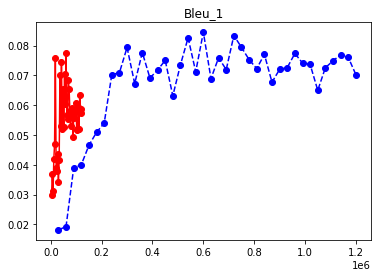

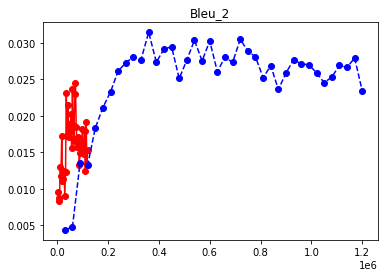

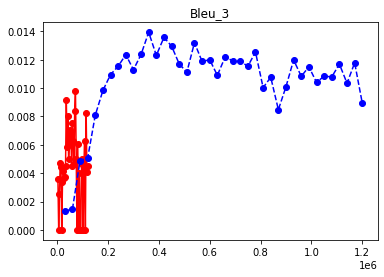

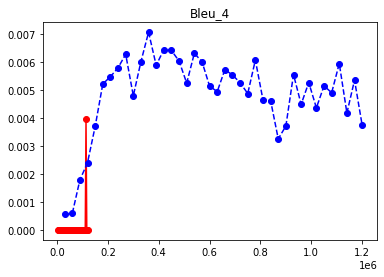

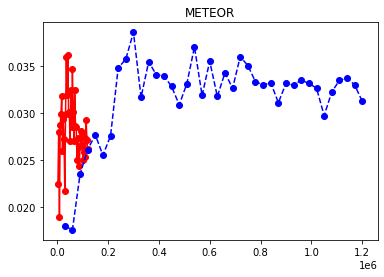

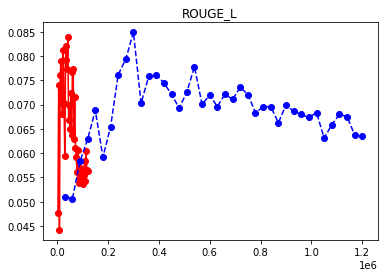

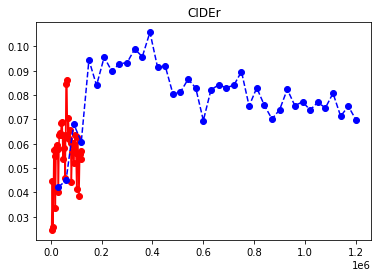

In [39]:
import matplotlib.pyplot as plt
# metrics = list(scores[list(scores.keys())[0]].keys())
metrics = ['Bleu_1', 'Bleu_2', 'Bleu_3', 'Bleu_4', 'METEOR', 'ROUGE_L', 'CIDEr']
for metric in metrics:
    tmp_xs = scores.keys()
    tmp_ys = [scores[x][metric] for x in tmp_xs]    
    x1, y1 = zip(*sorted(zip(tmp_xs, tmp_ys)))
    plt.plot(x1, y1, color='r', marker='o')
    tmp_xs = skt_kg_30000.keys()
    tmp_ys = [skt_kg_30000[x][metric] for x in tmp_xs]    
    x2, y2 = zip(*sorted(zip(tmp_xs, tmp_ys)))
    plt.plot(x2, y2, color='b', marker='o', linestyle='dashed')
    plt.title(metric)
    plt.show()


In [ ]:
import numpy
import matplotlib.pyplot as plt
metrics = ['Bleu_1', 'Bleu_2', 'Bleu_3', 'Bleu_4', 'METEOR', 'ROUGE_L', 'CIDEr']# metrics = list(scores[list(scores.keys())[0]].keys())

import os
from tqdm import tqdm
from nlgeval import compute_metrics
def agg_score(ckpt_dir):
    def file_to_tgt_ground_list(file_path):
        tgts = []
        grounds = []
        with open(file_path, 'r')as f:
            lines = f.readlines()
        input, ground, tgt = '', '', ''
        for idx, line in enumerate(lines):
            if idx%5==2:
                input = line
            elif idx%5==3:
                ground = line
                grounds.append([ground])
            elif idx%5==4:
                tgt = line
                tgts.append(tgt)
        return tgts, grounds

    g = os.walk(ckpt_dir)
    for path, dir_list, file_list in g:    
        if len(dir_list) != 0:
            path_prefix = path
            filenames = [f for f in file_list if '_result' in f]
    scores = {}
    for f in tqdm(filenames):
        step = int(f.split('ckpt-')[1].split('_result')[0])
        tgts, grounds = file_to_tgt_ground_list(os.path.join(path_prefix, f))
        scores[step] = compute_metrics(tgts, grounds, no_skipthoughts=True, no_glove=True)
    return scores
    

model_dict = {
    # 'skt_kg_3000': '../checkpoints/pchat/SKT_KG/20211221170636_3000_results',
    'skt_kg_30000': '../checkpoints/pchat/SKT_KG/20211222092820_rerun_30000',
}# 4 mins per evaluate

names = list(model_dict.keys())
model_scores = [agg_score(model_dict[i]) for i in names]


In [51]:
# Add a new model

name = 'skt_30000'
model_score = agg_score('../checkpoints/pchat/SequentialKnowledgeTransformer/20211222150124_rerun')
names.append(name)
model_scores.append(model_score)

name = 'skt_kg_unsuper_30000'
model_score = agg_score('../checkpoints/pchat/SKT_KG/20211227032704_rerun')
names.append(name)
model_scores.append(model_score)


  0%|          | 0/12 [00:00<?, ?it/s]

Bleu_1: 0.068167
Bleu_2: 0.026911
Bleu_3: 0.012732
Bleu_4: 0.006340
METEOR: 0.033451
ROUGE_L: 0.074545


  8%|▊         | 1/12 [00:06<01:12,  6.61s/it]

CIDEr: 0.087474
Bleu_1: 0.069240
Bleu_2: 0.026427
Bleu_3: 0.010702
Bleu_4: 0.004612
METEOR: 0.033364
ROUGE_L: 0.075081


 17%|█▋        | 2/12 [00:12<01:04,  6.44s/it]

CIDEr: 0.091696
Bleu_1: 0.070300
Bleu_2: 0.025476
Bleu_3: 0.010450
Bleu_4: 0.005014
METEOR: 0.033522
ROUGE_L: 0.072548


 25%|██▌       | 3/12 [00:19<00:57,  6.39s/it]

CIDEr: 0.079932
Bleu_1: 0.054671
Bleu_2: 0.023164
Bleu_3: 0.010957
Bleu_4: 0.005363
METEOR: 0.030881
ROUGE_L: 0.071383


 33%|███▎      | 4/12 [00:25<00:50,  6.34s/it]

CIDEr: 0.102777
Bleu_1: 0.036864
Bleu_2: 0.011834
Bleu_3: 0.003570
Bleu_4: 0.000000
METEOR: 0.025538
ROUGE_L: 0.063449


 42%|████▏     | 5/12 [00:32<00:44,  6.40s/it]

CIDEr: 0.053403
Bleu_1: 0.073222
Bleu_2: 0.029041
Bleu_3: 0.012621
Bleu_4: 0.005655
METEOR: 0.034335
ROUGE_L: 0.074882


 50%|█████     | 6/12 [00:38<00:38,  6.41s/it]

CIDEr: 0.086930
Bleu_1: 0.014100
Bleu_2: 0.002994
Bleu_3: 0.000973
Bleu_4: 0.000000
METEOR: 0.014074
ROUGE_L: 0.040495


 58%|█████▊    | 7/12 [00:44<00:31,  6.39s/it]

CIDEr: 0.033654
Bleu_1: 0.036456
Bleu_2: 0.013527
Bleu_3: 0.005777
Bleu_4: 0.002020
METEOR: 0.023700
ROUGE_L: 0.059055


 67%|██████▋   | 8/12 [00:50<00:25,  6.32s/it]

CIDEr: 0.060257
Bleu_1: 0.053537
Bleu_2: 0.018581
Bleu_3: 0.007627
Bleu_4: 0.003433
METEOR: 0.030218
ROUGE_L: 0.070206


 75%|███████▌  | 9/12 [00:57<00:19,  6.33s/it]

CIDEr: 0.074284
Bleu_1: 0.035509
Bleu_2: 0.011709
Bleu_3: 0.004378
Bleu_4: 0.002050
METEOR: 0.024988
ROUGE_L: 0.061182


 83%|████████▎ | 10/12 [01:03<00:12,  6.28s/it]

CIDEr: 0.061274
Bleu_1: 0.061151
Bleu_2: 0.024188
Bleu_3: 0.011085
Bleu_4: 0.004731
METEOR: 0.030428
ROUGE_L: 0.072079


 92%|█████████▏| 11/12 [01:09<00:06,  6.28s/it]

CIDEr: 0.088865
Bleu_1: 0.062171
Bleu_2: 0.027774
Bleu_3: 0.013421
Bleu_4: 0.006387
METEOR: 0.031706
ROUGE_L: 0.071981


100%|██████████| 12/12 [01:16<00:00,  6.35s/it]

CIDEr: 0.110448


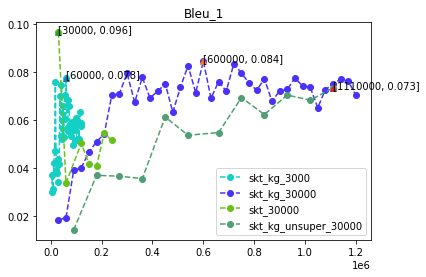

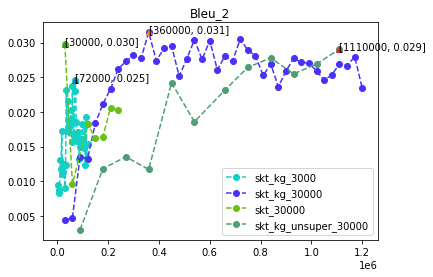

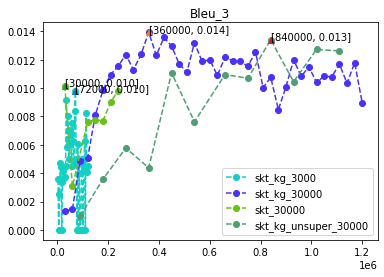

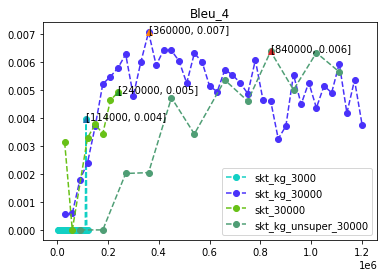

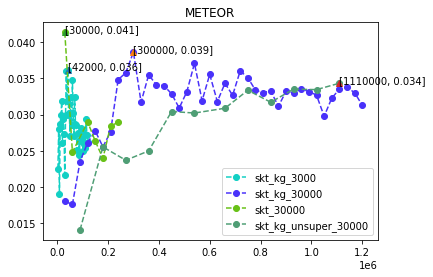

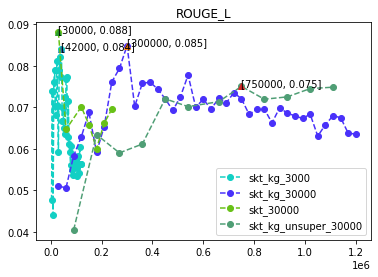

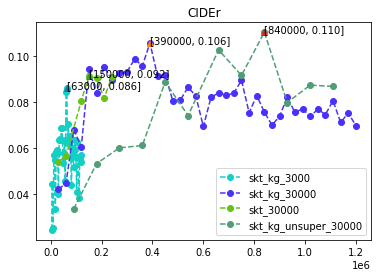

In [60]:
for metric in metrics:
    numpy.random.seed(4321)
    for idx, score in enumerate(model_scores):
        tmp_xs = score.keys()
        tmp_ys = [score[x][metric] for x in tmp_xs]    
        x, y = zip(*sorted(zip(tmp_xs, tmp_ys)))
        plt.plot(x, y, color=numpy.random.rand(3,), marker='o', linestyle='dashed', label=names[idx])
        # annotates the max
        y_max = numpy.argmax(y)
        # text_max = '[' + '%.e'%(x[y_max]) + ', ' + '%.3f'%(y[y_max]) +']'
        text_max = '[' + str(x[y_max]) + ', ' + '%.3f'%(y[y_max]) +']'
        plt.plot(x[y_max], y[y_max], '^')
        plt.annotate(text_max, xy=(x[y_max], y[y_max]), xytext=(x[y_max], y[y_max]))
    plt.legend()
    plt.title(metric)    
    plt.show()

In [ ]:
# temperate draw seq2seq (for word/char, seperately)
import re
result_dir = '/home/faan/Project/dous/pytorch-seq2seq/result_ori'

def split_char(str):
	english = 'abcdefghijklmnopqrstuvwxyz0123456789'
	output = []
	buffer = ''
	for s in str:
		if s in english or s in english.upper(): #英文或数字
			buffer += s
		else: #中文
			if buffer:
				output.append(buffer)
			buffer = ''
			output.append(s)
	if buffer:
		output.append(buffer)
	return output

def agg_score_s2s(ckpt_dir):
    def file_to_tgt_ground_list(file_path):
        tgts = []
        grounds = []
        tgts_char = []
        grounds_char = []
        with open(file_path, 'r')as f:
            lines = f.readlines()
        for idx, line in enumerate(lines):
            try:
                line = line.strip()+' '
                ground, tgt = line.split('\t')[1], line.strip().split('\t')[2]
            except:# generated Null string
                continue
            if '<unk>' in ground:
                # remove unk
                ground, tgt = ground.replace('<unk>', ''), tgt.replace('<unk>', '')
                ground = re.sub(r'[\s]+', ' ',ground)
                ground = re.sub(r'^[\s]+', '',ground)
                ground = re.sub(r'[\s]+$', '',ground)
                tgt = re.sub(r'[\s]+', ' ',tgt)
                tgt = re.sub(r'^[\s]+', '',tgt)
                tgt = re.sub(r'[\s]+$', '',tgt)
                # Words
                tgts.append(tgt)
                grounds.append([ground])
                # Chars
                tgts_char.append(' '.join(split_char(tgt.replace(' ', ''))))
                grounds_char.append([' '.join(split_char(ground.replace(' ', '')))])
        return tgts, grounds, tgts_char, grounds_char

    g = os.walk(ckpt_dir)
    for path, dir_list, file_list in g:    
        path_prefix = path
        filenames = file_list
    
    scores = {}
    scores_char = {}
    for f in tqdm(filenames):
        step = int(f.split('.tsv')[0])
        #FIXME: set all
        # if step<=22:
        tgts, grounds, tgts_char, grounds_char = file_to_tgt_ground_list(os.path.join(path_prefix, f))
        scores[step] = compute_metrics(tgts, grounds, no_skipthoughts=True, no_glove=True)
        scores_char[step] = compute_metrics(tgts_char, grounds_char, no_skipthoughts=True, no_glove=True)
    return scores, scores_char

seq2seq_score, seq2seq_score_char = agg_score_s2s(result_dir)


In [82]:
# name = 'seq2seq_30000'
# model_score = agg_score('../checkpoints/pchat/SKT_KG/20211227032704_rerun')
names.append('seq2seq_30000_word')
model_scores.append(seq2seq_score)
names.append('seq2seq_30000_char')
model_scores.append(seq2seq_score_char)

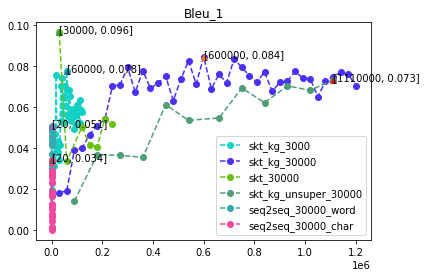

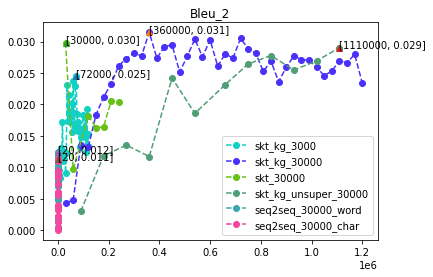

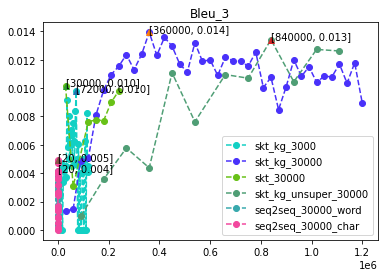

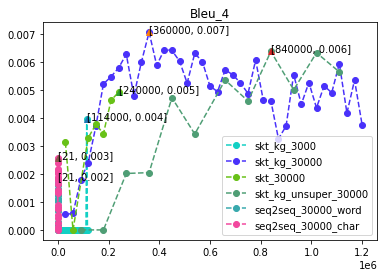

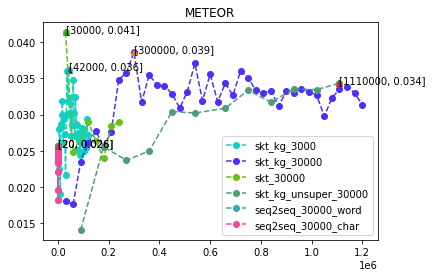

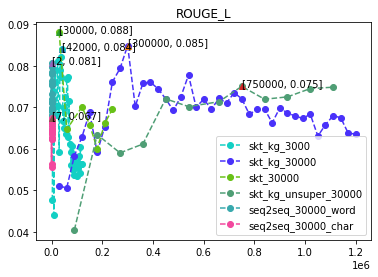

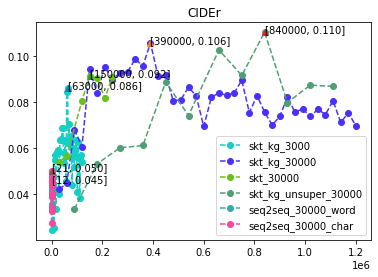

In [83]:
for metric in metrics:
    numpy.random.seed(4321)
    for idx, score in enumerate(model_scores):
        tmp_xs = score.keys()
        tmp_ys = [score[x][metric] for x in tmp_xs]    
        x, y = zip(*sorted(zip(tmp_xs, tmp_ys)))
        plt.plot(x, y, color=numpy.random.rand(3,), marker='o', linestyle='dashed', label=names[idx])
        # annotates the max
        y_max = numpy.argmax(y)
        # text_max = '[' + '%.e'%(x[y_max]) + ', ' + '%.3f'%(y[y_max]) +']'
        text_max = '[' + str(x[y_max]) + ', ' + '%.3f'%(y[y_max]) +']'
        plt.plot(x[y_max], y[y_max], '^')
        plt.annotate(text_max, xy=(x[y_max], y[y_max]), xytext=(x[y_max], y[y_max]))
    plt.legend()
    plt.title(metric)    
    plt.show()

In [3]:
# temperate evaluate DHAP #FIXME: 300000 User only but other models based on 30000 User
dhap = '/home/faan/Project/dous/DHAP/result_ori30' # exactly 300000
# dhap_b = '/home/faan/Project/dous/DHAP/result_bak' # maybe 30000
# [f for f in filename if 'ckpt' not in f] # ckpts are also took as eval anchors
from nlgeval import compute_metrics
from tqdm import tqdm
import re

def split_char(str):
	english = 'abcdefghijklmnopqrstuvwxyz0123456789'
	output = []
	buffer = ''
	for s in str:
		if s in english or s in english.upper(): #英文或数字
			buffer += s
		else: #中文
			if buffer:
				output.append(buffer)
			buffer = ''
			output.append(s)
	if buffer:
		output.append(buffer)
	return output

def agg_score_s2s(ckpt_dir):
    def file_to_tgt_ground_list(file_path):
        tgts = []
        grounds = []
        tgts_char = []
        grounds_char = []
        with open(file_path, 'r')as f:
            lines = f.readlines()
        for idx, line in enumerate(lines):
            try:
                line = line.strip()+' '
                ground, tgt = line.split('\t')[1], line.strip().split('\t')[2]
            except:# generated Null string
                continue
            if '<UNK>' in ground:
                # remove unk
                ground, tgt = ground.replace('<UNK>', ''), tgt.replace('<UNK>', '')
                ground = re.sub(r'[\s]+', ' ',ground)
                ground = re.sub(r'^[\s]+', '',ground)
                ground = re.sub(r'[\s]+$', '',ground)
                tgt = re.sub(r'[\s]+', ' ',tgt)
                tgt = re.sub(r'^[\s]+', '',tgt)
                tgt = re.sub(r'[\s]+$', '',tgt)
                # Words
                tgts.append(tgt)
                grounds.append([ground])
                # Chars
                tgts_char.append(' '.join(split_char(tgt.replace(' ', ''))))
                grounds_char.append([' '.join(split_char(ground.replace(' ', '')))])
        return tgts, grounds, tgts_char, grounds_char

    g = os.walk(ckpt_dir)
    for path, dir_list, file_list in g:    
        path_prefix = path
        filenames = [f for f in file_list if 'ckpt' not in f]
    
    scores = {}
    scores_char = {}
    for f in tqdm(filenames):
        step = int(f.split('.tsv')[0])
        #FIXME: set all
        # if step<=22:
        tgts, grounds, tgts_char, grounds_char = file_to_tgt_ground_list(os.path.join(path_prefix, f))
        scores[step] = compute_metrics(tgts, grounds, no_skipthoughts=True, no_glove=True)
        scores_char[step] = compute_metrics(tgts_char, grounds_char, no_skipthoughts=True, no_glove=True)
    return scores, scores_char

dhap_score, dhap_score_char = agg_score_s2s(dhap)


  0%|          | 0/80 [00:00<?, ?it/s]

Bleu_1: 0.067907
Bleu_2: 0.019861
Bleu_3: 0.009404
Bleu_4: 0.005579
METEOR: 0.030324
ROUGE_L: 0.070228
CIDEr: 0.063963
Bleu_1: 0.060246
Bleu_2: 0.023078
Bleu_3: 0.011882
Bleu_4: 0.007443
METEOR: 0.030364
ROUGE_L: 0.069103


  6%|▋         | 5/80 [00:12<03:12,  2.57s/it]

CIDEr: 0.080421
Bleu_1: 0.056070
Bleu_2: 0.016953
Bleu_3: 0.007647
Bleu_4: 0.004358
METEOR: 0.031302
ROUGE_L: 0.093956
CIDEr: 0.079858
Bleu_1: 0.028760
Bleu_2: 0.011226
Bleu_3: 0.006258
Bleu_4: 0.004088
METEOR: 0.031318
ROUGE_L: 0.081422


 12%|█▎        | 10/80 [00:25<02:57,  2.53s/it]

CIDEr: 0.077590
Bleu_1: 0.069843
Bleu_2: 0.021064
Bleu_3: 0.010572
Bleu_4: 0.006759
METEOR: 0.030516
ROUGE_L: 0.069878
CIDEr: 0.065273
Bleu_1: 0.060990
Bleu_2: 0.023606
Bleu_3: 0.012872
Bleu_4: 0.008674
METEOR: 0.030554
ROUGE_L: 0.068261


 24%|██▍       | 19/80 [00:38<01:53,  1.87s/it]

CIDEr: 0.083442
Bleu_1: 0.063404
Bleu_2: 0.019845
Bleu_3: 0.009997
Bleu_4: 0.006435
METEOR: 0.032550
ROUGE_L: 0.091823
CIDEr: 0.088645
Bleu_1: 0.038989
Bleu_2: 0.015729
Bleu_3: 0.009082
Bleu_4: 0.006154
METEOR: 0.032567
ROUGE_L: 0.082848


 26%|██▋       | 21/80 [00:51<02:35,  2.63s/it]

CIDEr: 0.095660
Bleu_1: 0.069973
Bleu_2: 0.020798
Bleu_3: 0.010400
Bleu_4: 0.006866
METEOR: 0.031994
ROUGE_L: 0.085273
CIDEr: 0.077314
Bleu_1: 0.049357
Bleu_2: 0.019774
Bleu_3: 0.011295
Bleu_4: 0.007652
METEOR: 0.032033
ROUGE_L: 0.078065


 28%|██▊       | 22/80 [01:04<03:34,  3.70s/it]

CIDEr: 0.091797
Bleu_1: 0.074449
Bleu_2: 0.024611
Bleu_3: 0.012425
Bleu_4: 0.007913
METEOR: 0.033518
ROUGE_L: 0.087284
CIDEr: 0.086520
Bleu_1: 0.054733
Bleu_2: 0.022296
Bleu_3: 0.012380
Bleu_4: 0.008307
METEOR: 0.033535
ROUGE_L: 0.080465


 32%|███▎      | 26/80 [01:17<03:11,  3.54s/it]

CIDEr: 0.097000
Bleu_1: 0.076310
Bleu_2: 0.022718
Bleu_3: 0.011046
Bleu_4: 0.006662
METEOR: 0.032231
ROUGE_L: 0.076332
CIDEr: 0.072300
Bleu_1: 0.064660
Bleu_2: 0.025687
Bleu_3: 0.013778
Bleu_4: 0.008954
METEOR: 0.032248
ROUGE_L: 0.072855


 36%|███▋      | 29/80 [01:30<03:11,  3.75s/it]

CIDEr: 0.087127
Bleu_1: 0.070825
Bleu_2: 0.022677
Bleu_3: 0.011680
Bleu_4: 0.007643
METEOR: 0.032028
ROUGE_L: 0.077206
CIDEr: 0.077163
Bleu_1: 0.058313
Bleu_2: 0.023886
Bleu_3: 0.013398
Bleu_4: 0.009056
METEOR: 0.032070
ROUGE_L: 0.074596


 42%|████▎     | 34/80 [01:43<02:31,  3.30s/it]

CIDEr: 0.094168
Bleu_1: 0.055369
Bleu_2: 0.017457
Bleu_3: 0.008831
Bleu_4: 0.005620
METEOR: 0.032618
ROUGE_L: 0.098990
CIDEr: 0.085082
Bleu_1: 0.026479
Bleu_2: 0.010521
Bleu_3: 0.006192
Bleu_4: 0.004301
METEOR: 0.032635
ROUGE_L: 0.085601


 44%|████▍     | 35/80 [01:56<03:11,  4.26s/it]

CIDEr: 0.084865
Bleu_1: 0.074285
Bleu_2: 0.023904
Bleu_3: 0.012345
Bleu_4: 0.007740
METEOR: 0.032509
ROUGE_L: 0.085399
CIDEr: 0.078916
Bleu_1: 0.050683
Bleu_2: 0.020502
Bleu_3: 0.011619
Bleu_4: 0.007747
METEOR: 0.032525
ROUGE_L: 0.077466


 45%|████▌     | 36/80 [02:09<03:56,  5.37s/it]

CIDEr: 0.087966
Bleu_1: 0.072212
Bleu_2: 0.023042
Bleu_3: 0.011409
Bleu_4: 0.007258
METEOR: 0.031367
ROUGE_L: 0.074844
CIDEr: 0.072935
Bleu_1: 0.061057
Bleu_2: 0.024989
Bleu_3: 0.013837
Bleu_4: 0.009202
METEOR: 0.031406
ROUGE_L: 0.072027


 46%|████▋     | 37/80 [02:22<04:41,  6.55s/it]

CIDEr: 0.089707
Bleu_1: 0.041061
Bleu_2: 0.012398
Bleu_3: 0.005646
Bleu_4: 0.003382
METEOR: 0.032194
ROUGE_L: 0.101815
CIDEr: 0.084542
Bleu_1: 0.016327
Bleu_2: 0.006285
Bleu_3: 0.003619
Bleu_4: 0.002513
METEOR: 0.032211
ROUGE_L: 0.086425


 51%|█████▏    | 41/80 [02:34<03:12,  4.93s/it]

CIDEr: 0.082203
Bleu_1: 0.069045
Bleu_2: 0.021923
Bleu_3: 0.010991
Bleu_4: 0.006656
METEOR: 0.031849
ROUGE_L: 0.089825
CIDEr: 0.084118
Bleu_1: 0.043071
Bleu_2: 0.017467
Bleu_3: 0.009752
Bleu_4: 0.006295
METEOR: 0.031865
ROUGE_L: 0.080543


 52%|█████▎    | 42/80 [02:47<03:51,  6.10s/it]

CIDEr: 0.090432
Bleu_1: 0.033786
Bleu_2: 0.009827
Bleu_3: 0.004617
Bleu_4: 0.002609
METEOR: 0.029129
ROUGE_L: 0.092215
CIDEr: 0.075966
Bleu_1: 0.012779
Bleu_2: 0.004918
Bleu_3: 0.002810
Bleu_4: 0.001861
METEOR: 0.029144
ROUGE_L: 0.078847


 59%|█████▉    | 47/80 [03:00<02:21,  4.28s/it]

CIDEr: 0.076749
Bleu_1: 0.072613
Bleu_2: 0.022053
Bleu_3: 0.011467
Bleu_4: 0.007439
METEOR: 0.031709
ROUGE_L: 0.076438
CIDEr: 0.072479
Bleu_1: 0.059747
Bleu_2: 0.023319
Bleu_3: 0.012902
Bleu_4: 0.008814
METEOR: 0.031748
ROUGE_L: 0.072657


 64%|██████▍   | 51/80 [03:13<01:53,  3.91s/it]

CIDEr: 0.084809
Bleu_1: 0.070586
Bleu_2: 0.021823
Bleu_3: 0.010691
Bleu_4: 0.006646
METEOR: 0.031982
ROUGE_L: 0.082675
CIDEr: 0.074827
Bleu_1: 0.051543
Bleu_2: 0.020857
Bleu_3: 0.011317
Bleu_4: 0.007469
METEOR: 0.032021
ROUGE_L: 0.077050


 66%|██████▋   | 53/80 [03:25<01:58,  4.41s/it]

CIDEr: 0.086457
Bleu_1: 0.044749
Bleu_2: 0.011986
Bleu_3: 0.005239
Bleu_4: 0.002850
METEOR: 0.031075
ROUGE_L: 0.101811
CIDEr: 0.076014
Bleu_1: 0.017199
Bleu_2: 0.005835
Bleu_3: 0.003191
Bleu_4: 0.002134
METEOR: 0.031090
ROUGE_L: 0.084970


 72%|███████▎  | 58/80 [03:38<01:19,  3.60s/it]

CIDEr: 0.074400
Bleu_1: 0.067484
Bleu_2: 0.022608
Bleu_3: 0.011541
Bleu_4: 0.007444
METEOR: 0.032366
ROUGE_L: 0.089333
CIDEr: 0.085987
Bleu_1: 0.043292
Bleu_2: 0.018229
Bleu_3: 0.010478
Bleu_4: 0.007164
METEOR: 0.032382
ROUGE_L: 0.079984


 74%|███████▍  | 59/80 [03:51<01:36,  4.59s/it]

CIDEr: 0.091837
Bleu_1: 0.073337
Bleu_2: 0.023403
Bleu_3: 0.011147
Bleu_4: 0.006922
METEOR: 0.032699
ROUGE_L: 0.080925
CIDEr: 0.073429
Bleu_1: 0.057283
Bleu_2: 0.023308
Bleu_3: 0.012510
Bleu_4: 0.008149
METEOR: 0.032719
ROUGE_L: 0.076689


 79%|███████▉  | 63/80 [04:04<01:09,  4.08s/it]

CIDEr: 0.085893
Bleu_1: 0.076390
Bleu_2: 0.022308
Bleu_3: 0.010902
Bleu_4: 0.006781
METEOR: 0.032459
ROUGE_L: 0.080382
CIDEr: 0.072146
Bleu_1: 0.061066
Bleu_2: 0.023514
Bleu_3: 0.012472
Bleu_4: 0.008164
METEOR: 0.032502
ROUGE_L: 0.075595


 80%|████████  | 64/80 [04:17<01:22,  5.15s/it]

CIDEr: 0.085454
Bleu_1: 0.074031
Bleu_2: 0.023086
Bleu_3: 0.011068
Bleu_4: 0.006703
METEOR: 0.032775
ROUGE_L: 0.095832
CIDEr: 0.083945
Bleu_1: 0.043689
Bleu_2: 0.016929
Bleu_3: 0.009552
Bleu_4: 0.006362
METEOR: 0.032792
ROUGE_L: 0.084595


 81%|████████▏ | 65/80 [04:29<01:33,  6.24s/it]

CIDEr: 0.087073
Bleu_1: 0.074103
Bleu_2: 0.022233
Bleu_3: 0.011618
Bleu_4: 0.007681
METEOR: 0.031895
ROUGE_L: 0.072853
CIDEr: 0.067575
Bleu_1: 0.065718
Bleu_2: 0.025160
Bleu_3: 0.013587
Bleu_4: 0.008904
METEOR: 0.031934
ROUGE_L: 0.070935


 84%|████████▍ | 67/80 [04:42<01:22,  6.32s/it]

CIDEr: 0.085362
Bleu_1: 0.074353
Bleu_2: 0.024130
Bleu_3: 0.011962
Bleu_4: 0.007534
METEOR: 0.032990
ROUGE_L: 0.083186
CIDEr: 0.078041
Bleu_1: 0.056111
Bleu_2: 0.022787
Bleu_3: 0.012587
Bleu_4: 0.008514
METEOR: 0.033032
ROUGE_L: 0.076999


100%|██████████| 80/80 [04:55<00:00,  3.70s/it]

CIDEr: 0.088415


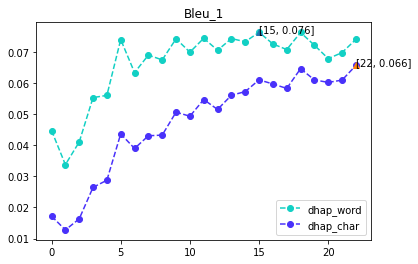

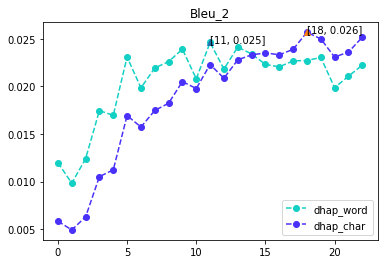

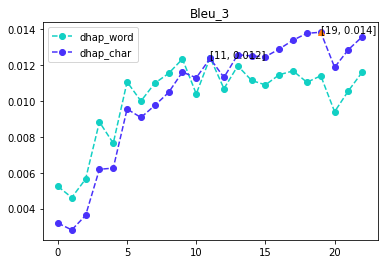

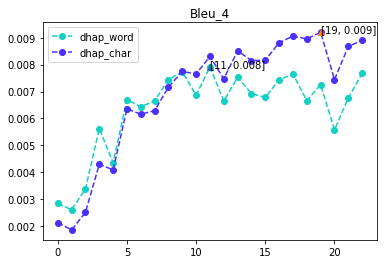

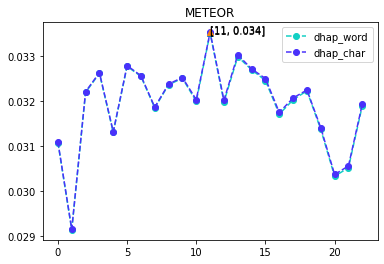

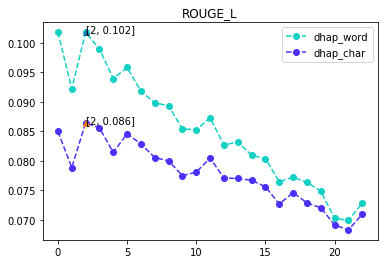

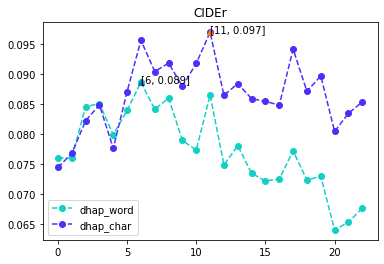

In [6]:
import numpy
import matplotlib.pyplot as plt
metrics = ['Bleu_1', 'Bleu_2', 'Bleu_3', 'Bleu_4', 'METEOR', 'ROUGE_L', 'CIDEr']# metrics = list(scores[list(scores.keys())[0]].keys())
names = ['dhap_word', 'dhap_char']
for metric in metrics:
    numpy.random.seed(4321)
    for idx, score in enumerate([dhap_score, dhap_score_char]):
        tmp_xs = score.keys()
        tmp_ys = [score[x][metric] for x in tmp_xs]    
        x, y = zip(*sorted(zip(tmp_xs, tmp_ys)))
        plt.plot(x, y, color=numpy.random.rand(3,), marker='o', linestyle='dashed', label=names[idx])
        # annotates the max
        y_max = numpy.argmax(y)
        # text_max = '[' + '%.e'%(x[y_max]) + ', ' + '%.3f'%(y[y_max]) +']'
        text_max = '[' + str(x[y_max]) + ', ' + '%.3f'%(y[y_max]) +']'
        plt.plot(x[y_max], y[y_max], '^')
        plt.annotate(text_max, xy=(x[y_max], y[y_max]), xytext=(x[y_max], y[y_max]))
    plt.legend()
    plt.title(metric)    
    plt.show()